### Übungsaufgabe 3 - Rubin Mehralivand

Wir betrachten erneut die AWA:
$$f(y) = \cos(\frac{\pi}{2}y) - 2y \qquad u(0) = 1$$
Auf dem Intervall $I = [0, 2]$. <br>
Dieses Mal jedoch mit anderen Methoden. Wie immer sind $n = \frac{T}{h}$ die Anzahl an Schritten.

In [140]:
import numpy as np
import matplotlib.pyplot as plt

Wir implementieren direkt unsere rechte Seite $f(y(t),t)$ mit den jeweiligen Anfangswerten.

In [141]:
u0 = 1
t0 = 0

def f(y: float) -> float:
    return np.cos(np.pi/2 * y) - 2*y

### a)
Hier implementieren wir die modifizierte Eulermethode mit der Vorschrift:
$$y^h_n = y_{n-1}^h + h f(y_{n-1}^h + \frac{h}{2}f(y_{n-1}^h))$$
Wobei wir die $y_{n-1}^h + \frac{h}{2}f(y_{n-1}^h)$ aus der expliziten Eulermethode berechnen und dann in die Vorschrift einfügen.

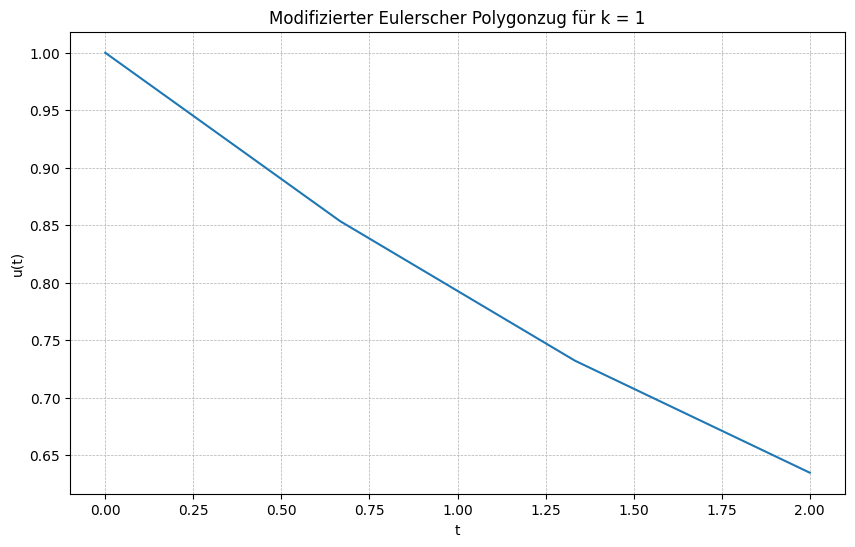

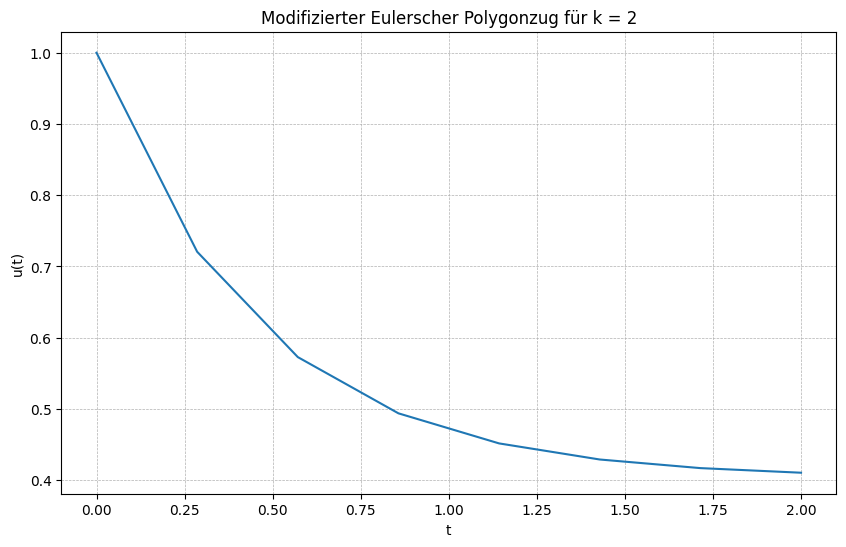

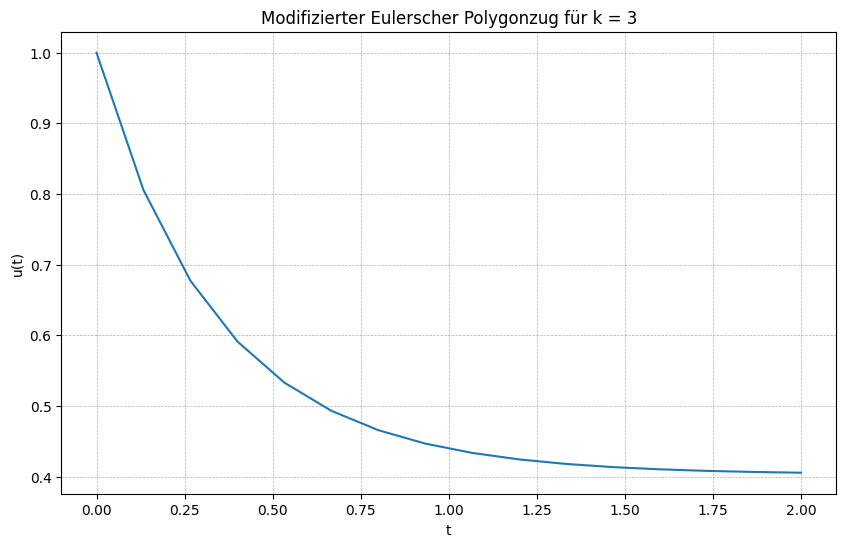

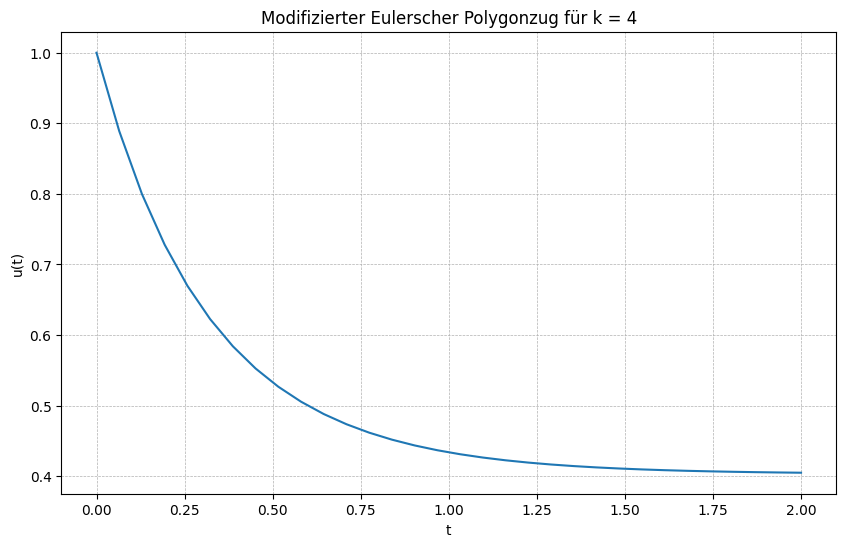

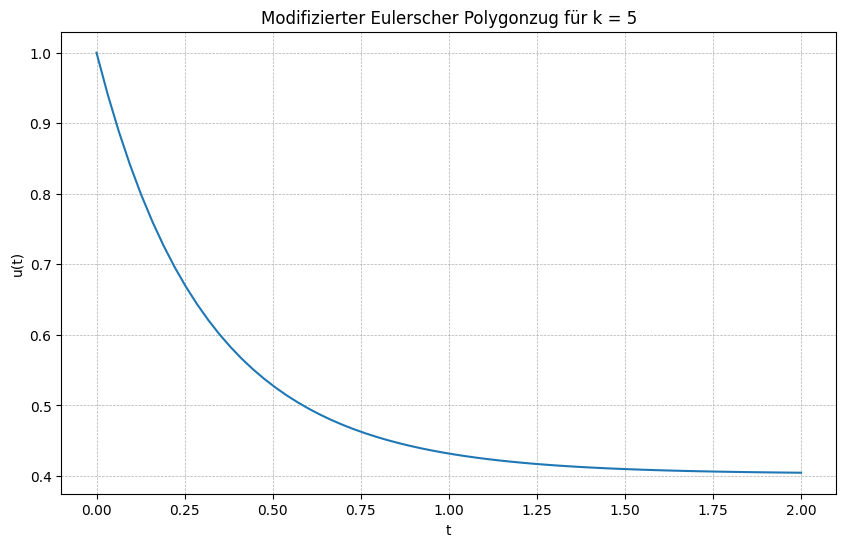

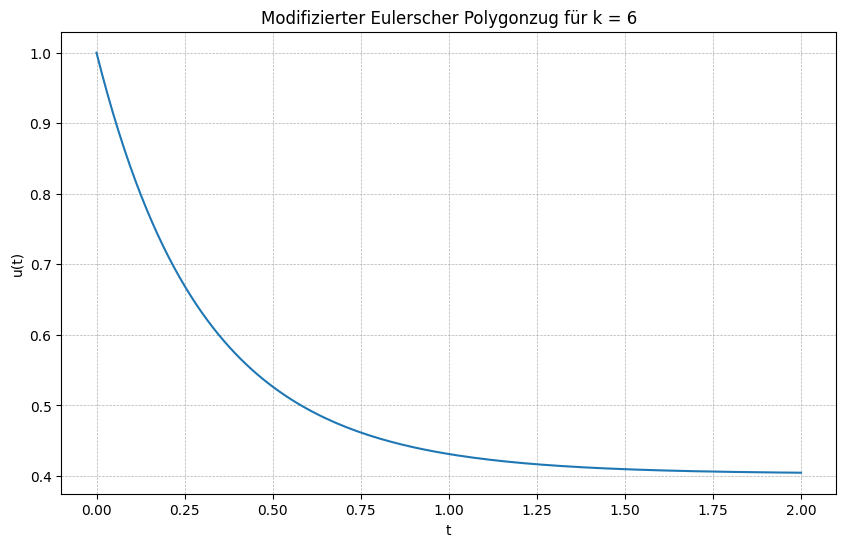

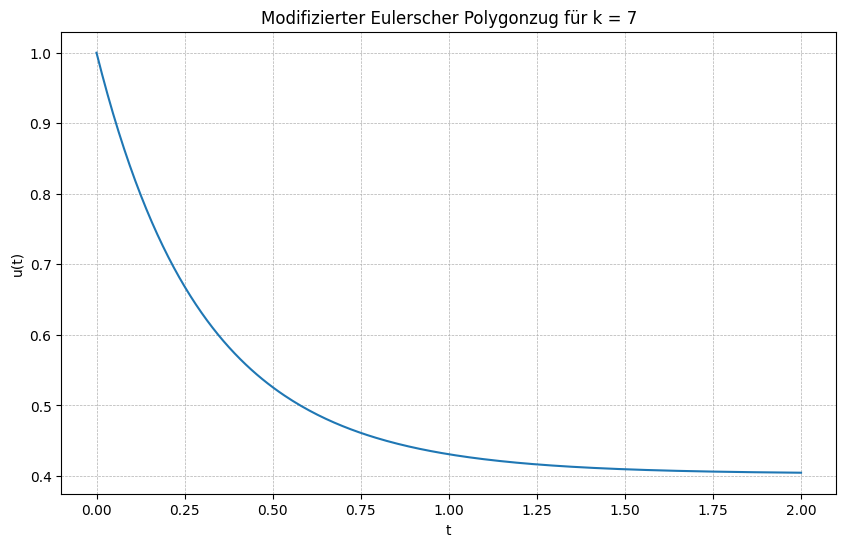

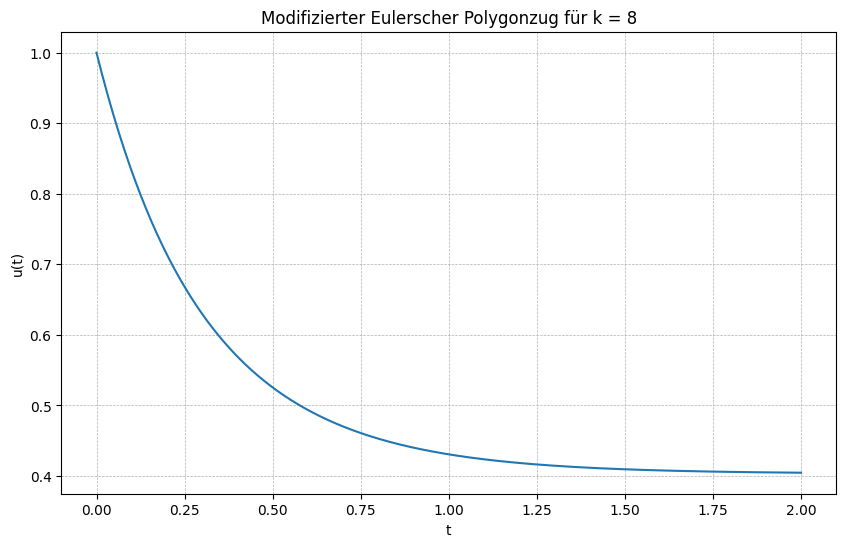

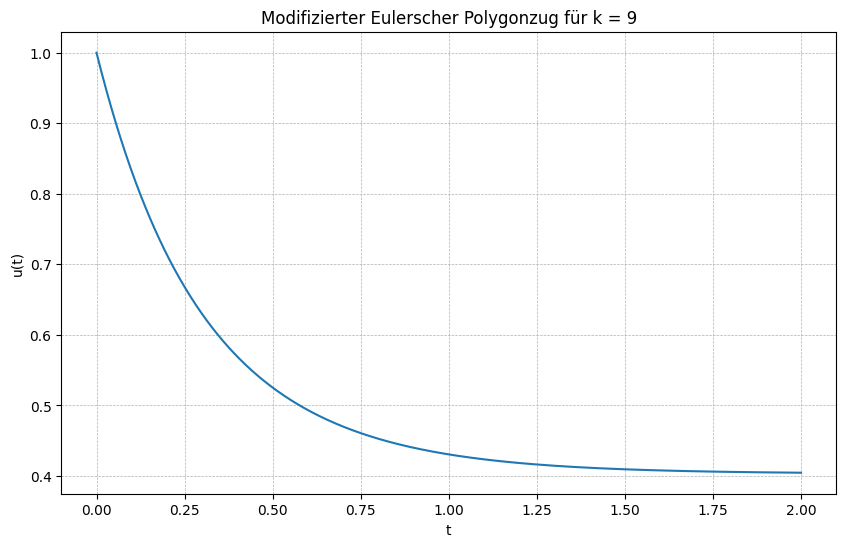

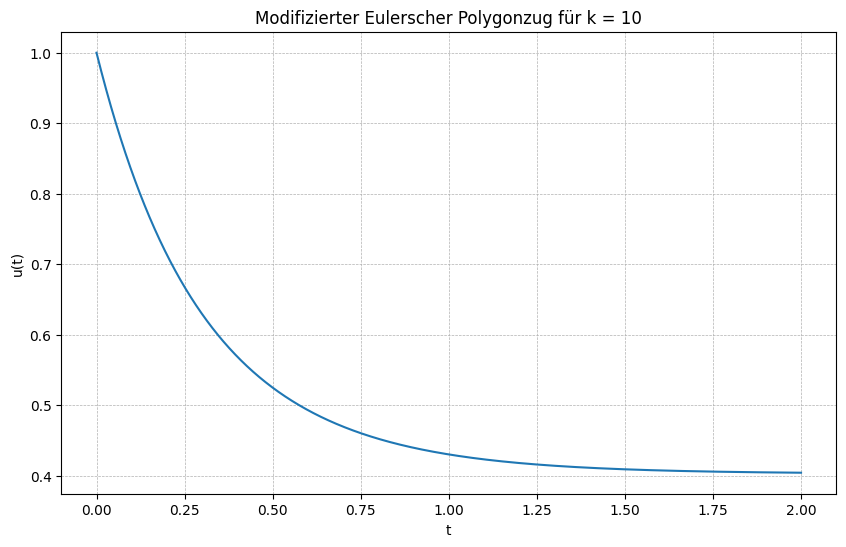

In [147]:
def modified_euler(t0: float, T: float, u0: float, h: float) -> np.array:
    n = int(T/h)
    t = np.linspace(t0, T, n)
    y = np.zeros(n)
    y[0] = u0

    # Iterationsvorschrift modifizertes Eulerverfahren
    for i in range(1, n):
        euler = y[i-1] + (h/2) * f(y[i-1])
        y[i] = y[i-1] + h * f(euler)

    return t, y


for k in range(1, 11):
    # Konstanten für die Auswertung auf k = 1,...,10
    h = 2**(-k)
    T = 2

    ts, ys = modified_euler(t0, T, u0, h)

    # Uninteressantes Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(ts, ys, label="Trajektorie")
    plt.xlabel("t")
    plt.ylabel("u(t)")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.title(f"Modifizierter Eulerscher Polygonzug für k = {k}")
    plt.show()

### b)
Hier implementieren wir die Heunmethode mit der Vorschrift:
$$y^h_n = y_{n-1}^h + \frac{h}{2} (y_{n-1} + f(y_{n} + h f(y_{n}))$$
Wobei wir die $y_k + hf(y_k)$ aus der expliziten Eulermethode berechnen und dann in die Vorschrift einfügen.

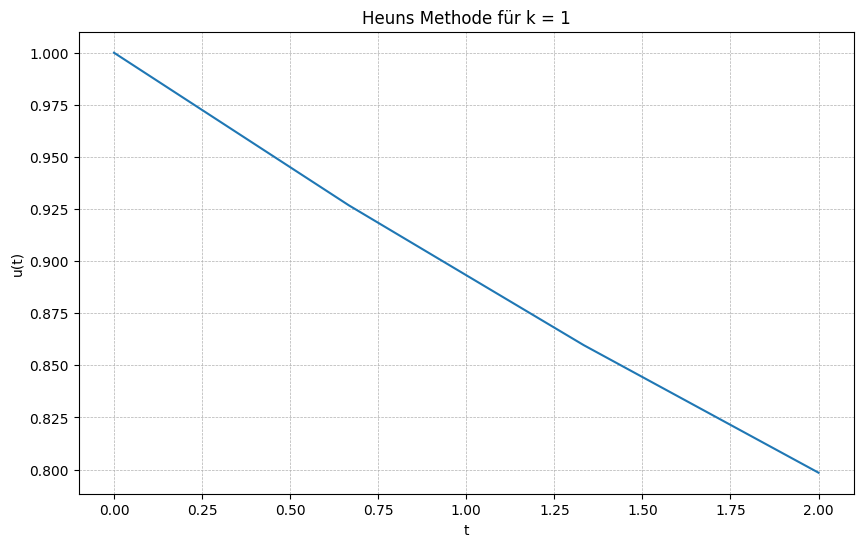

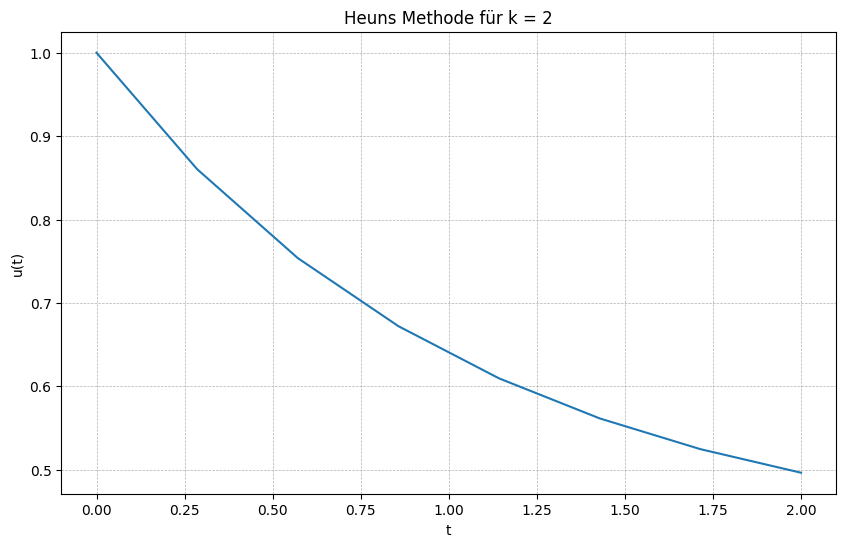

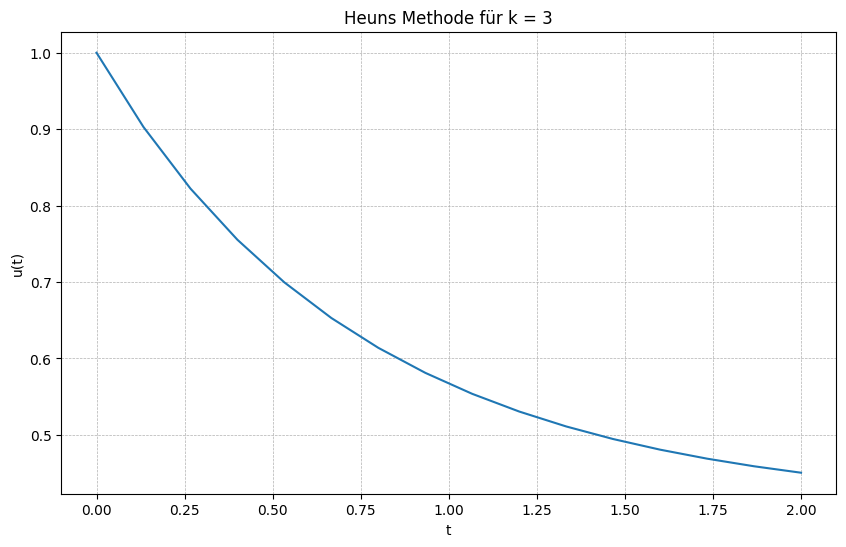

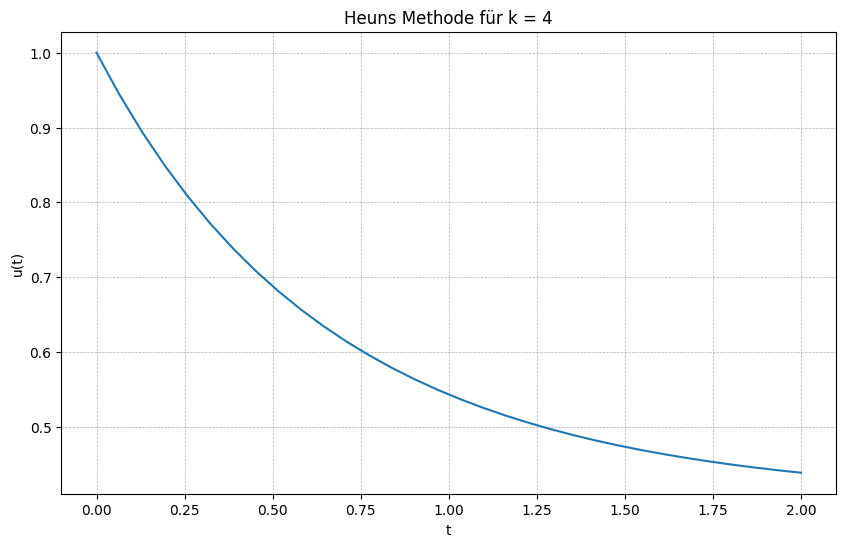

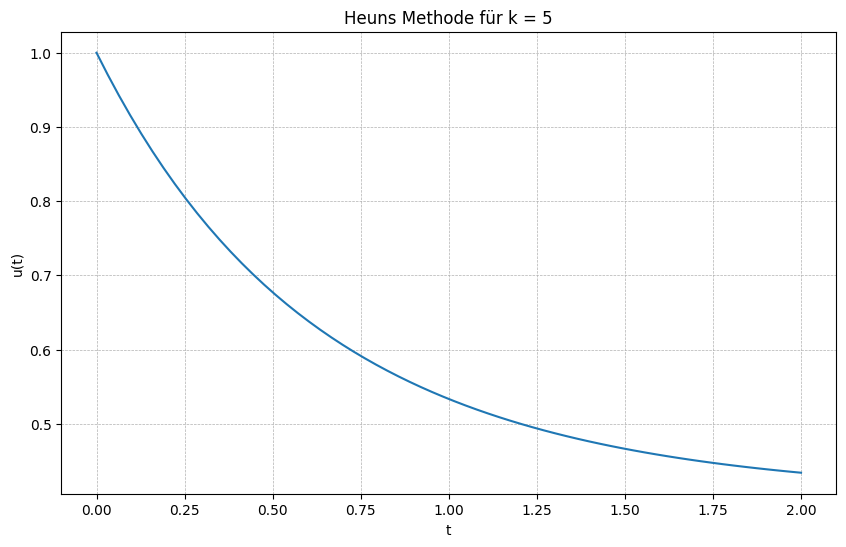

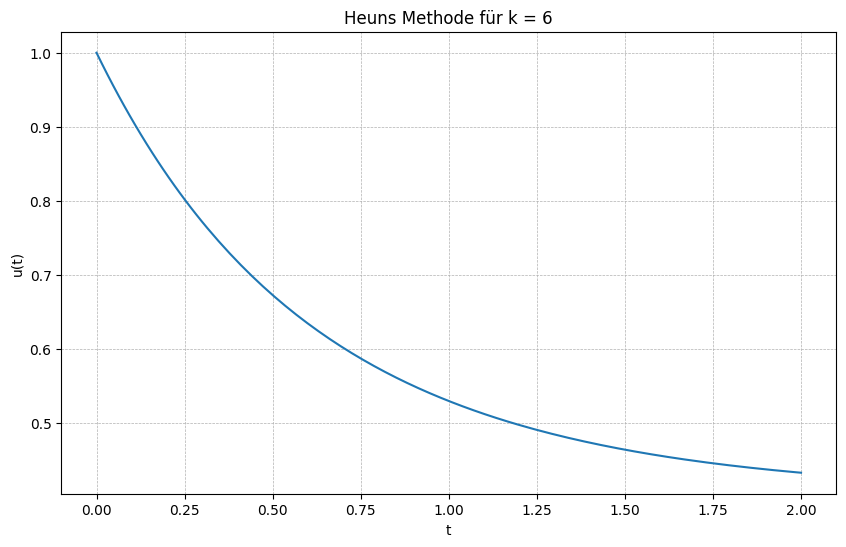

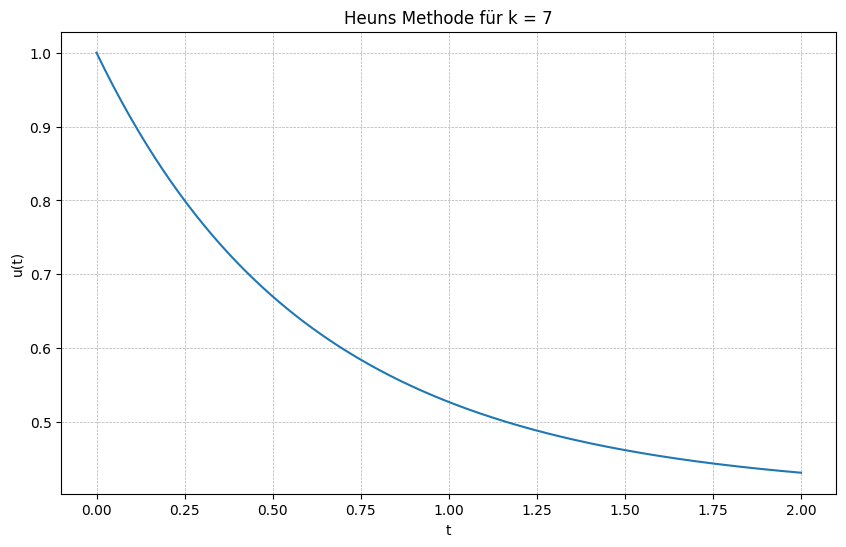

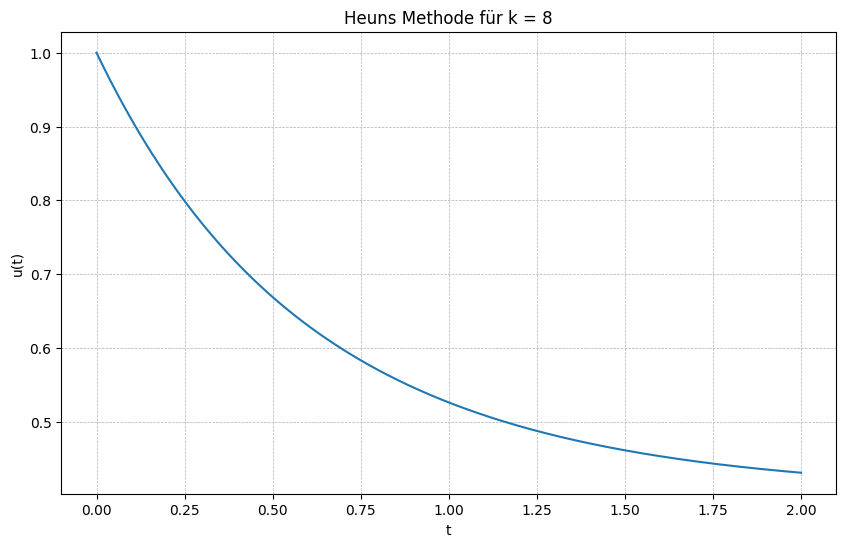

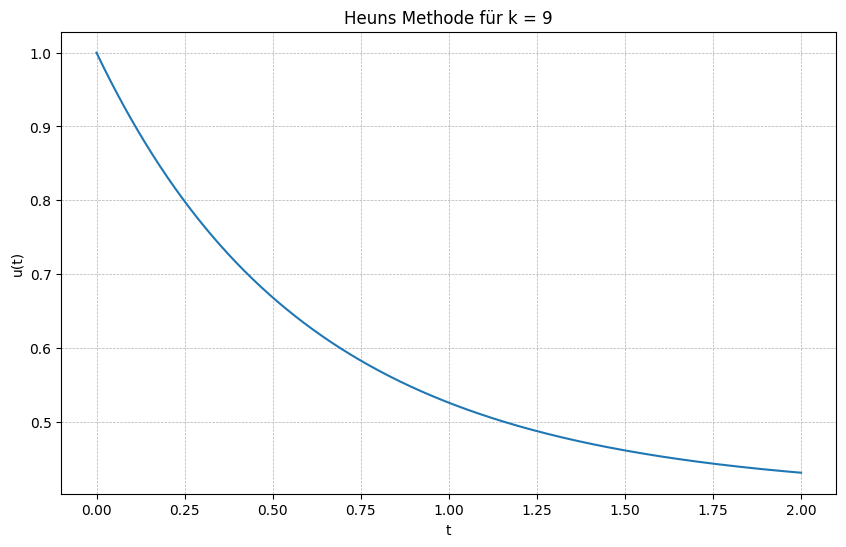

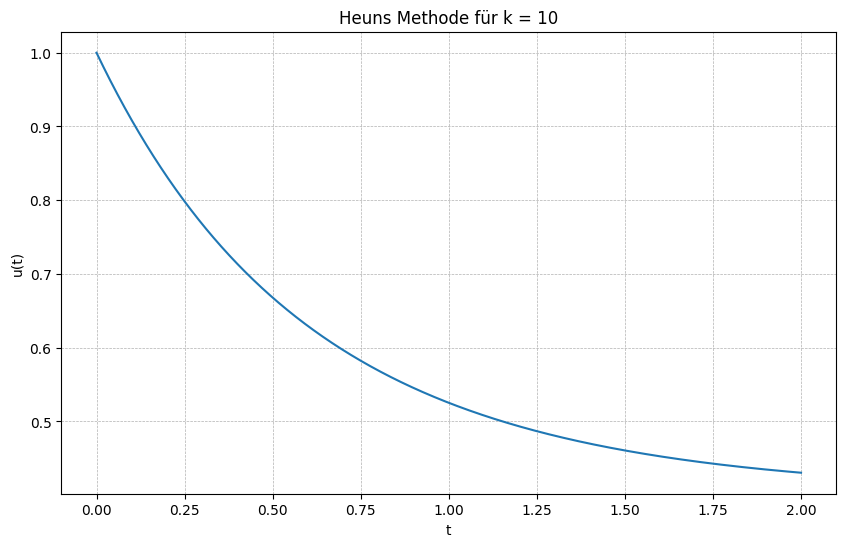

In [143]:
def heun(t0: float, T: float, u0: float, h: float) -> np.array:
    n = int(T/h)
    t = np.linspace(t0, T, n)
    y = np.zeros(n)
    y[0] = u0

    for i in range(1, n):
        euler = y[i-1] + h * f(y[i-1])
        y[i] = y[i-1] + (h/2) * (y[i-1] + f(euler))

    return t, y


for k in range(1, 11):
    # Konstanten für die Auswertung auf k = 1,...,10
    h = 2**(-k)
    T = 2

    ts, ys = modified_euler(t0, T, u0, h)

    # Uninteressantes Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(ts, ys, label="Trajektorie")
    plt.xlabel("t")
    plt.ylabel("u(t)")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.title(f"Heuns Methode für k = {k}")
    plt.show()

Schlussendlich berechnen wir die beiden Fehler im Vergleich zur expliziten Eulermethode und betrachten die Konvergenzen.

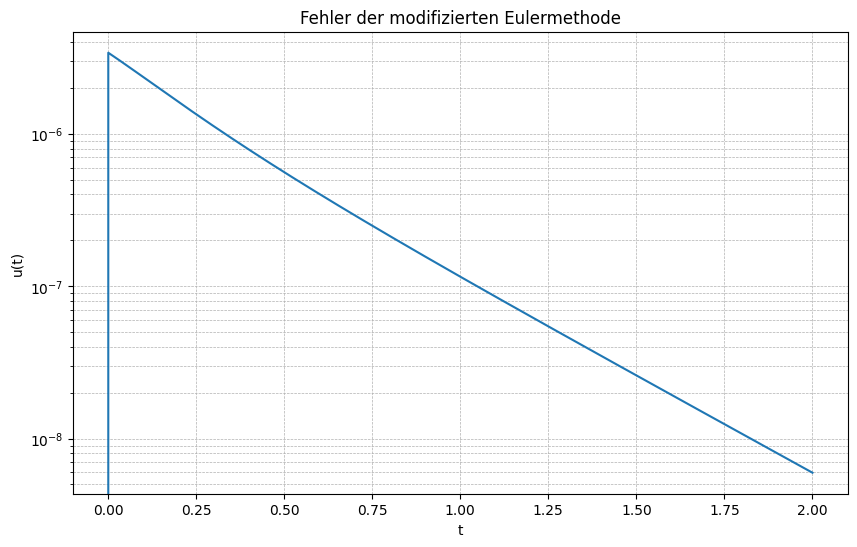

[0.         0.00146825 0.00146716 ... 0.000665   0.00066491 0.00066481]


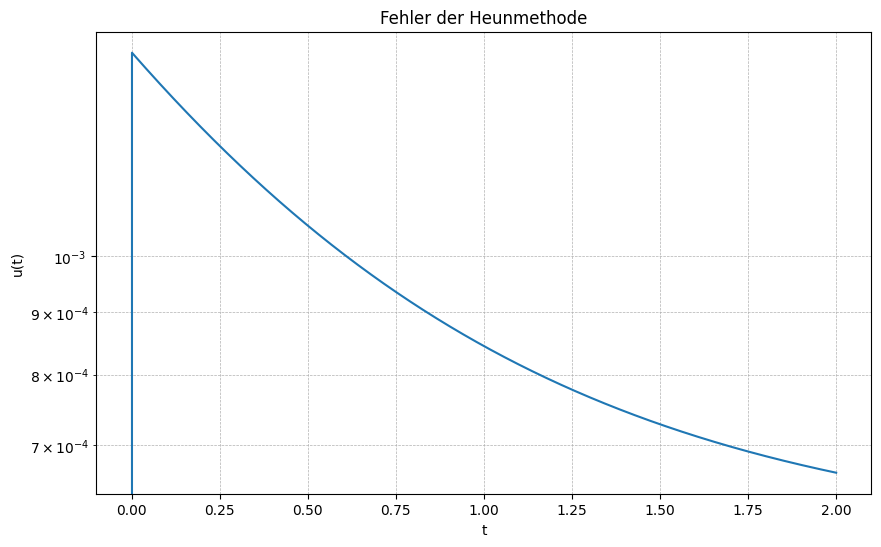

In [146]:
def error_modified_euler(t0: float, u0: int, T: int, h: float):
    n = int(T/h)
    t = np.linspace(t0, T, n)

    y = np.zeros(n)
    y_euler= np.zeros(n)

    y[0] = u0
    y_euler[0] = u0

    for i in range(1,n):
        # Hier findet die Fehlerberechnung statt
        y_euler[i] = y[i-1] + h * f(y[i-1])

        euler = y[i-1] + (h/2) * f(y[i-1])
        y[i] = y[i-1] + h * f(euler)

    return t, np.absolute(y_euler - y)

def error_heun(t0: float, u0: int, T: int, h: float):
    n = int(T/h)
    t = np.linspace(t0, T, n)

    y = np.zeros(n)
    y_euler = np.zeros(n)

    y[0] = u0
    y_euler[0] = u0

    for i in range(1,n):
        # Hier findet die Fehlerberechnung statt
        y_euler[i] = y[i-1] + h * f(y[i-1])

        euler = y[i-1] + h * f(y[i-1])
        y[i] = y[i-1] + (h/2) * (y[i-1] + f(euler))

    return t, np.absolute(y - y_euler)

# Uninteressantes Plotting

ts, ys = error_modified_euler(t0, u0, 2, 2**(-10))

plt.figure(figsize=(10, 6))
plt.plot(ts, ys, label="Fehler")
plt.xlabel("t")
plt.ylabel("u(t)")
plt.yscale('log')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.title(f"Fehler der modifizierten Eulermethode")
plt.show()

ts, ys = error_heun(t0, u0, 2, 2**(-10))

plt.figure(figsize=(10, 6))
plt.plot(ts, ys, label="Fehler")
plt.xlabel("t")
plt.ylabel("u(t)")
plt.yscale('log')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.title(f"Fehler der Heunmethode")
plt.show()


Der Fehler der Heunmethode sinkt tatsächlich quadratisch, ist also von der Ordnung $O(h^2)$ während die modifizierte Eulermethode bei $O(h)$ bleibt, jedoch bessere Präzision erreicht, als die normale Eulermethode.